In [ ]:
# install visualkeras, to visualize model architecture
pip install visualkeras

In [ ]:
#============= Import necessary utilities ===============
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar100
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import visualkeras

# **Data Pre-processing**

In [ ]:
# Some hyperparameters
batch_size = 100
num_classes = 100
epochs = 150

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255


169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
# create cifar100 labels
cifar100_labels = [ 'apple', # id 
                   'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
                    'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
                    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
                    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 
                    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper','snail', 'snake', 'spider',
                    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
                    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman','worm']


***Ενδεικτική Απεικόνιση Εικόνων***

***Random show of images in the dataset***

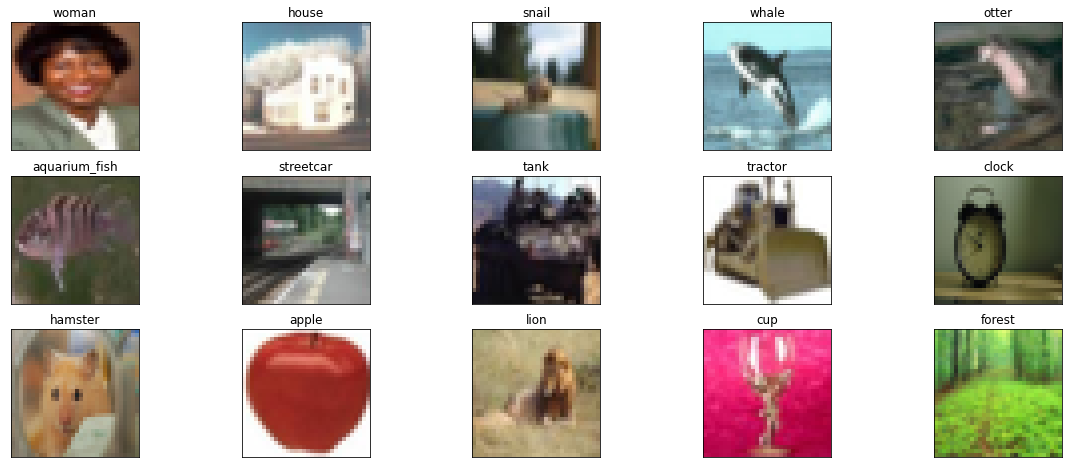

In [ ]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)): # random image selection
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_train[index])) # plot image
    label = np.argmax(y_train[index]) # correspond to decimal label
    ax.set_title("{}".format(cifar100_labels[label])) # title of image

## **Model Creation**
***I tried to optimize the model, using as few parameters as possible***

In [ ]:
model = Sequential()
# Input layer
model.add(BatchNormalization(axis=1)) 
model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(32,32,3),padding = 'same'))

# First Hidden Layer
model.add(BatchNormalization(axis=1)) 
model.add(Conv2D(64, kernel_size=(3, 3),  activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

# Second Hidden Layer
model.add(BatchNormalization(axis=1)) 
model.add(Conv2D(128,kernel_size = (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.3))


# Third Hidden Layer
model.add(BatchNormalization(axis=1)) 
model.add(Conv2D(128,kernel_size = (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

# Fourth Hidden Layer
model.add(BatchNormalization(axis=1)) 
model.add(Conv2D(256,kernel_size = (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.3))

# Output Layer
model.add(Flatten())
model.add(BatchNormalization(axis=1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(100,activation='softmax')) # decision neuron

model.build(input_shape=(batch_size,32,32,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (100, 32, 32, 3)         128       
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (100, 32, 32, 32)         896       
                                                                 
 batch_normalization_1 (Batc  (100, 32, 32, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (100, 32, 32, 64)         18496     
                                                                 
 max_pooling2d (MaxPooling2D  (100, 16, 16, 64)        0         
 )                                                               
                                                        

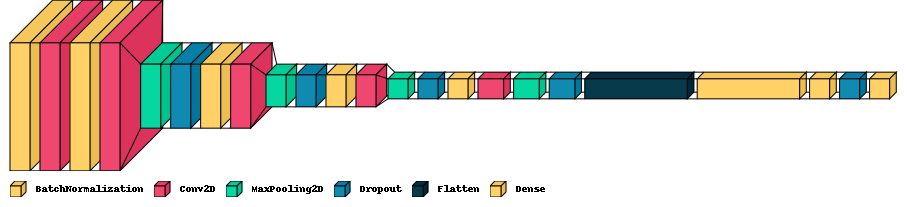

In [ ]:
visualkeras.layered_view(model, legend = True)

In [ ]:
# Train Model
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Use of callbacks to reduce overfitting

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

hist = model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          shuffle = True,
          verbose=1)

Epoch 1/150
448/450 [============================>.] - ETA: 0s - loss: 4.2335 - accuracy: 0.0684
Epoch 1: val_loss improved from inf to 3.76239, saving model to best_weights.hdf5
450/450 [==============================] - 22s 21ms/step - loss: 4.2316 - accuracy: 0.0686 - val_loss: 3.7624 - val_accuracy: 0.1192
Epoch 2/150
449/450 [============================>.] - ETA: 0s - loss: 3.5337 - accuracy: 0.1582
Epoch 2: val_loss improved from 3.76239 to 3.09677, saving model to best_weights.hdf5
450/450 [==============================] - 8s 19ms/step - loss: 3.5333 - accuracy: 0.1583 - val_loss: 3.0968 - val_accuracy: 0.2316
Epoch 3/150
449/450 [============================>.] - ETA: 0s - loss: 3.1247 - accuracy: 0.2242
Epoch 3: val_loss improved from 3.09677 to 2.67535, saving model to best_weights.hdf5
450/450 [==============================] - 9s 19ms/step - loss: 3.1248 - accuracy: 0.2242 - val_loss: 2.6753 - val_accuracy: 0.3236
Epoch 4/150
449/450 [============================>.] - ETA

In [ ]:
# Model Evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 1.4669 - accuracy: 0.6014
Test loss: 1.4669256210327148
Test accuracy: 0.6014000177383423


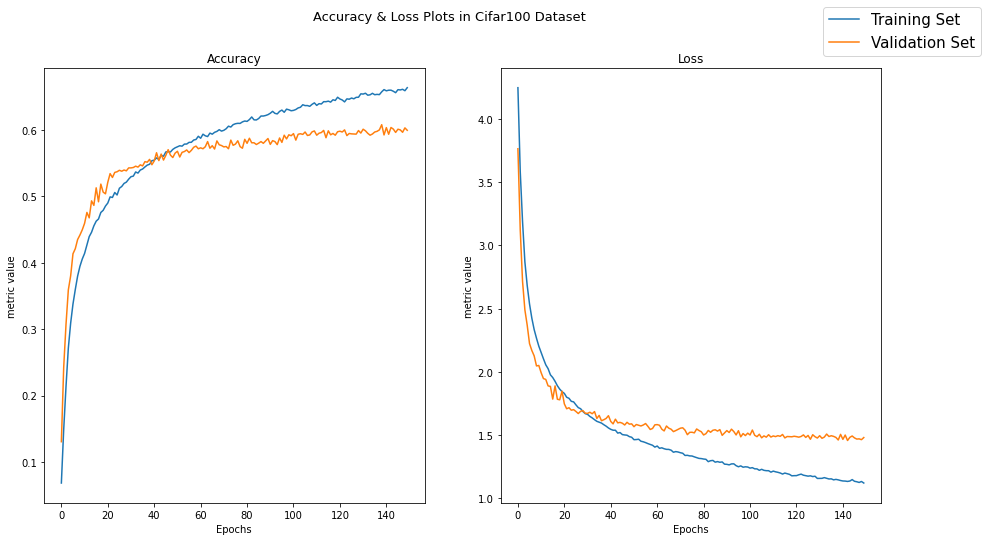

In [ ]:
# Plot Metrics
fig, axs = plt.subplots(1, 2, figsize = (15, 8))#, constrained_layout = True)

fig.suptitle('Accuracy & Loss Plots in Cifar100 Dataset', fontsize = 13)
axs[0].plot(hist.history['accuracy'])
axs[0].plot(hist.history['val_accuracy'])
axs[0].set_title('Accuracy', fontsize = 12)
axs[1].plot(hist.history['loss'])
axs[1].plot(hist.history['val_loss'])
axs[1].set_title('Loss', fontsize = 12)
for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='metric value')
fig.legend(['Training Set', 'Validation Set'],loc = 'upper right', fontsize = 15)

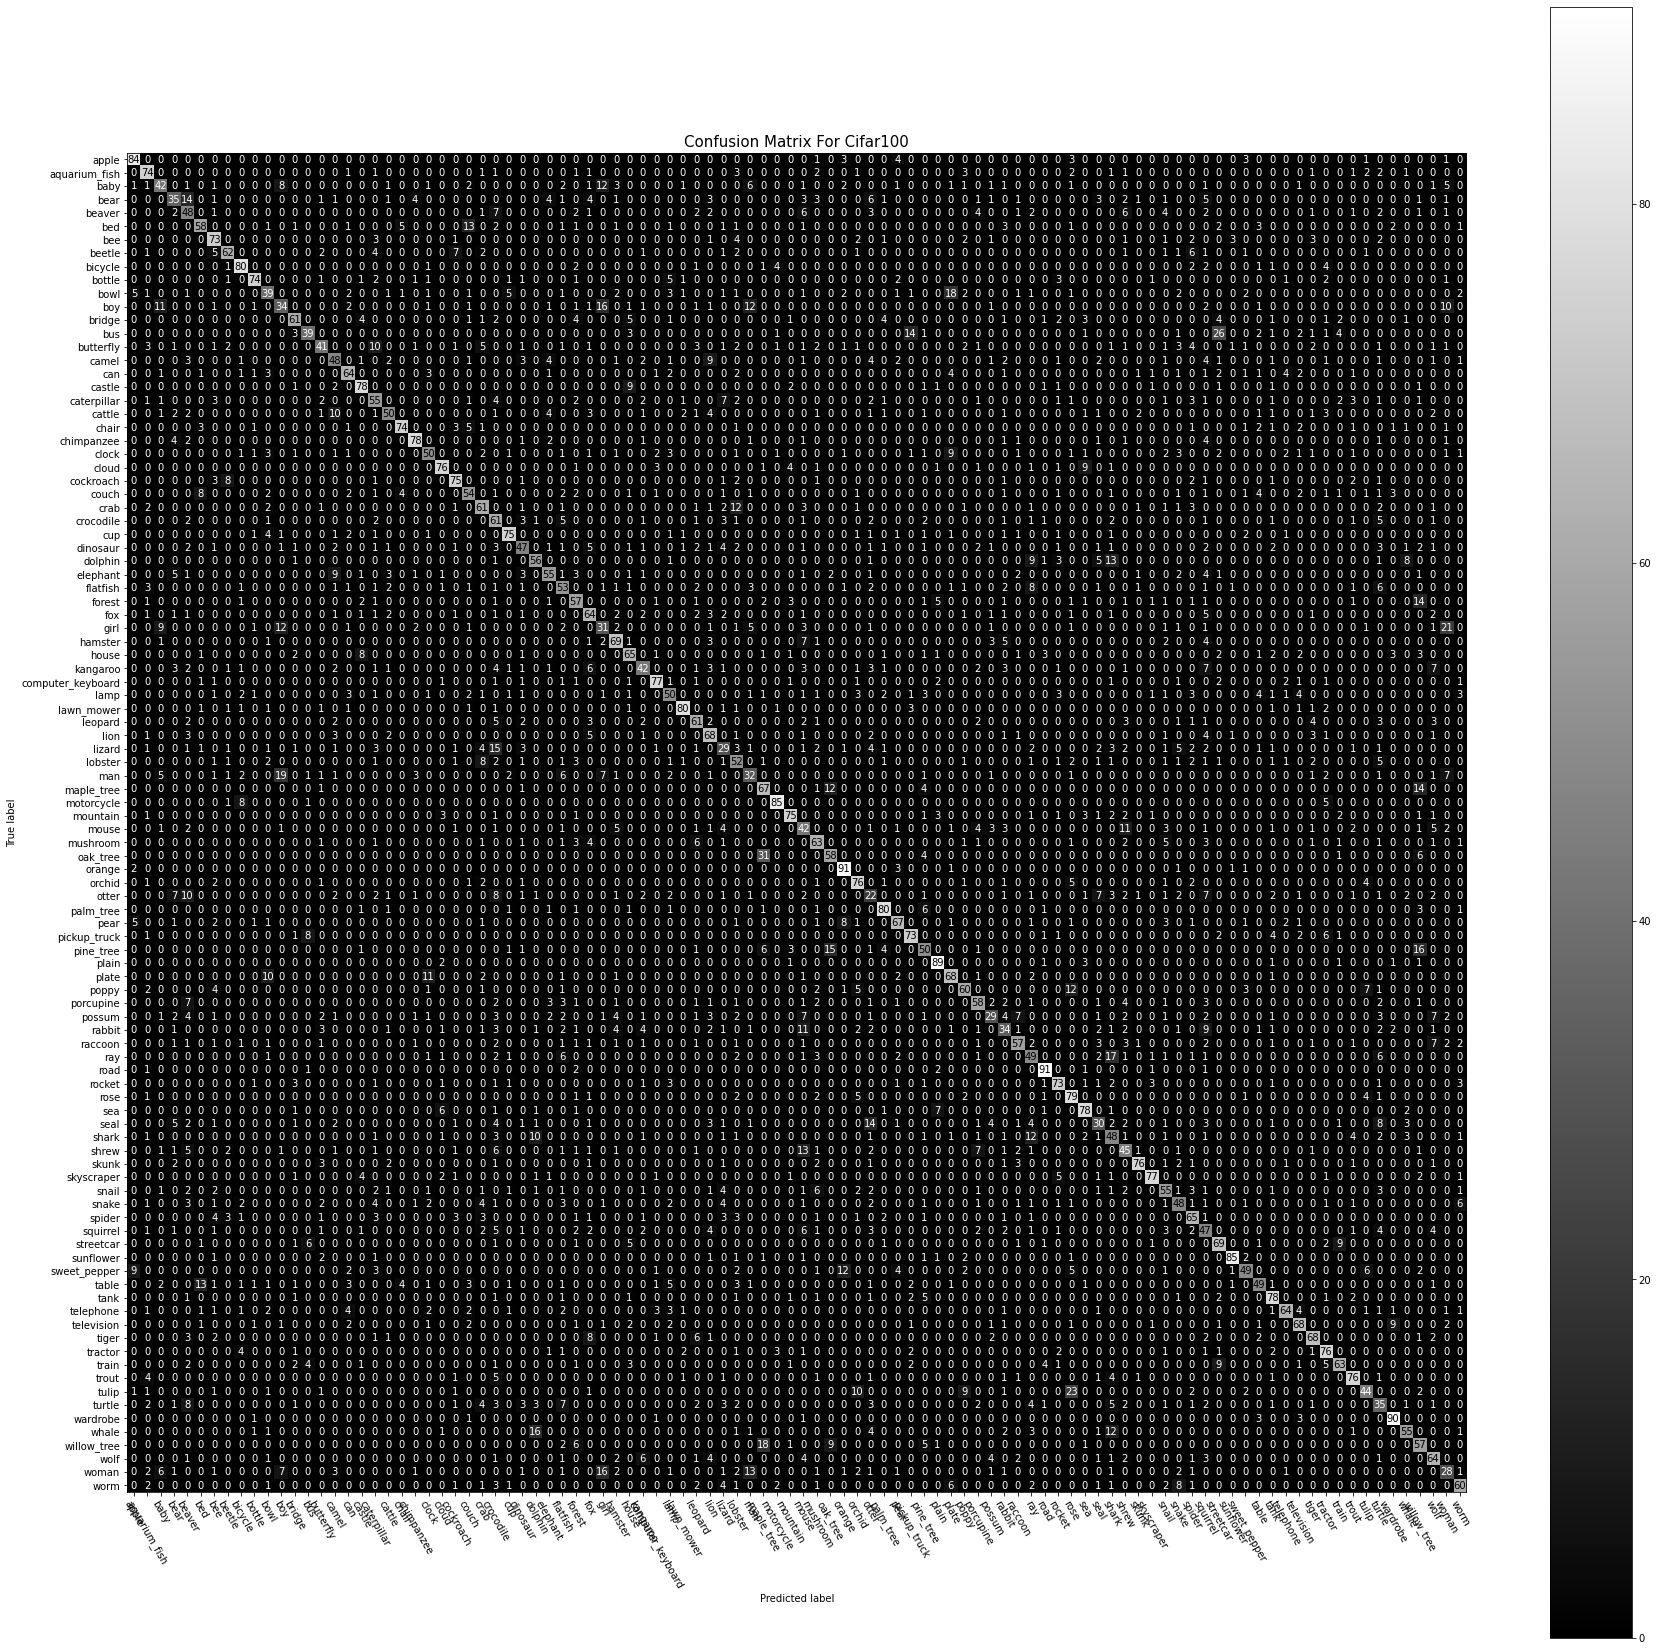

In [ ]:
# make predictions with model
y_pred = model.predict(x_test) # predict response using test samples
classes = np.argmax(y_pred,axis=1) # convert to class numbers in decimal representation
# Calculate confusion matrix
M = confusion_matrix(np.argmax(y_test,axis=1), classes)  # revert to decimal class representation
fig, ax = plt.subplots(figsize=(30, 30))
ConfusionMatrixDisplay(M, display_labels=cifar100_labels).plot(xticks_rotation=-60,ax = ax,cmap = 'gray')
plt.title('Confusion Matrix For Cifar100',fontsize=15)
fig.savefig("ConfusionMatrix.png")

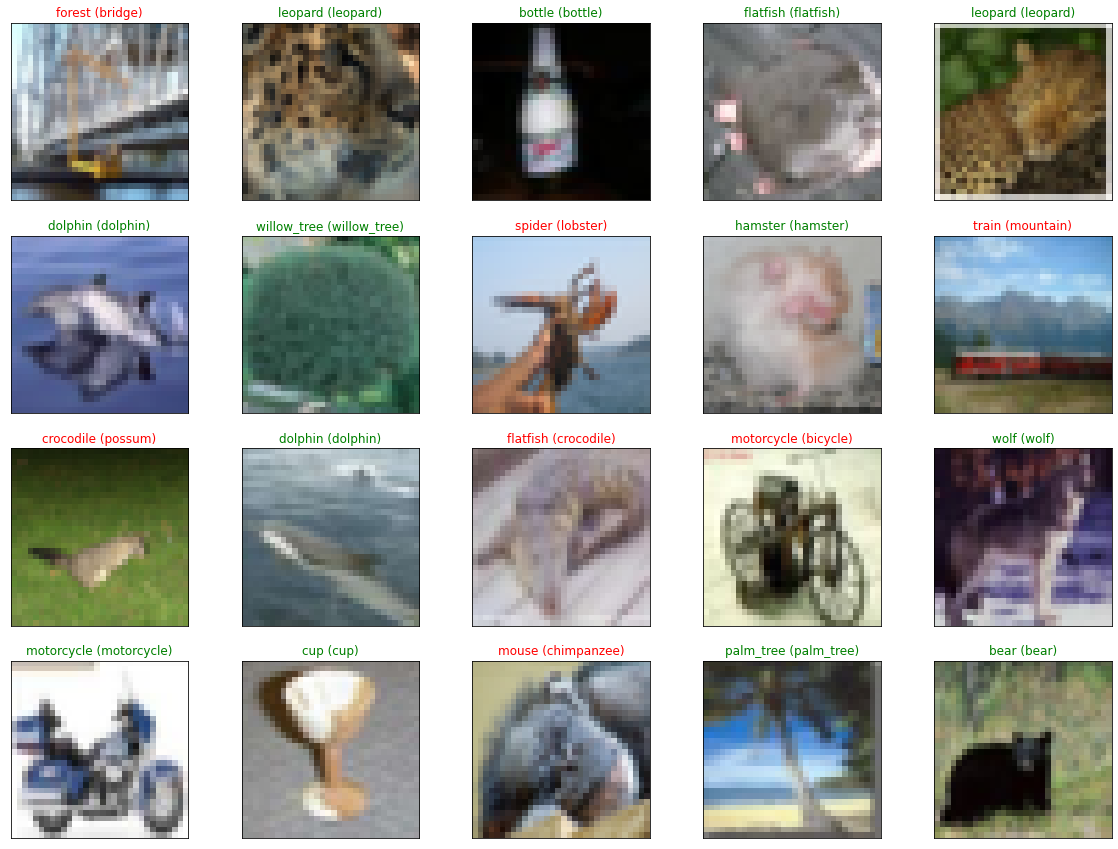

In [ ]:
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index])) # reshape image in order to plot
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar100_labels[predict_index], 
                                  cifar100_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)